# 1. loading datasets

Training has to be done with dropout as data is not always present

In [2]:
import torch
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:

from torch import nn 

# Check PyTorch version
print("PyTorch version:", torch.__version__)

# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Get current CUDA device index (if available)
if torch.cuda.is_available():
    print("Current CUDA device index:", torch.cuda.current_device())
    print("CUDA device name:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("No CUDA devices found.")



PyTorch version: 2.5.0+cu118
CUDA available: True
Current CUDA device index: 0
CUDA device name: NVIDIA GeForce RTX 3070


In [5]:
# Update with the correct path
# file_path = './Data/12_Sep_Readings/combined_data.csv'  
file_path = './Data/combined_data_withnoise.csv'
cleaned_df = pd.read_csv(file_path)

In [6]:
cleaned_df

,Tx_0 Batt,Tx_0 Time,Tx_1 Batt,Tx_1 Time,Tx_2 Batt,Tx_2 Time,Tx_3 Batt,Tx_3 Time,Tx_4 Batt,Tx_4 Time,...,X_Coord,Y_Coord,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI
0,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-62.122823,-78.219736,-73.073230,-77.286006,NaN,-72.291308,-68.092918,NaN
1,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-57.891682,-79.382984,-77.857881,-75.587366,NaN,-73.107593,-75.472177,NaN
2,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-60.578826,-81.601987,-74.946047,-75.487762,NaN,-74.452851,-71.910667,NaN
3,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-61.494779,-77.152818,-76.590577,-78.462631,NaN,-73.153706,-71.060839,NaN
4,4.18,0.0,4.19,0.0,4.17,0.0,4.16,0.0,NaN,0.0,...,1,1,-59.505243,-74.228609,-74.372560,-77.772084,NaN,-72.208839,-74.739739,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-77.137070,NaN,-74.352218,-57.951581,-82.165858,-67.218592,-65.694423,-86.684485
10996,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-76.148996,NaN,-77.237336,-66.029147,-84.424917,-66.766892,-62.416035,-80.962738
10997,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-77.476624,NaN,-73.934893,-60.120266,-80.562153,-62.742509,-62.057575,-85.860940
10998,NaN,0.0,NaN,0.0,4.16,0.0,4.17,0.0,NaN,0.0,...,7,5,-76.369396,NaN,-76.292584,-59.539495,-78.707161,-61.001181,-62.323374,-77.912220


In [7]:

batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]
time_columns = [col for col in cleaned_df.columns if 'Time' in col]
columns_to_drop = batt_columns+time_columns
RSSI_columns = cleaned_df.drop(columns=columns_to_drop)

cleaned_df = RSSI_columns.dropna()
# Check the cleaned DataFrame
cleaned_df.shape

(5300, 10)

In [8]:
from common_utils import preprocess_dataset

X = cleaned_df[['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']]
Y = cleaned_df[['X_Coord', 'Y_Coord']]

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the results
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("Y_train:\n", Y_train)
print("Y_test:\n", Y_test)

X_train:
        Tx_0 RSSI  Tx_1 RSSI  Tx_2 RSSI  Tx_3 RSSI  Tx_4 RSSI  Tx_5 RSSI  \
2202  -65.382984 -72.156727 -67.120266 -69.215664 -82.755946 -65.251952   
4623  -62.617757 -66.778027 -78.823543 -68.269087 -69.827874 -71.058447   
7719  -70.532313 -69.914898 -73.619450 -62.258305 -84.376199 -67.296439   
4477  -68.394938 -65.266622 -79.159650 -68.668362 -73.521874 -77.120905   
9517  -80.282681 -74.009340 -80.955924 -65.351741 -68.566141 -69.231592   
...          ...        ...        ...        ...        ...        ...   
6092  -75.607122 -72.058447 -71.757656 -66.795236 -74.556095 -71.394432   
7672  -72.079967 -70.230603 -71.657534 -63.118718 -80.231592 -70.323716   
10791 -71.365357 -82.107948 -79.113992 -61.640505 -77.442025 -64.369591   
10826 -76.956048 -82.551060 -82.029147 -58.816339 -82.943629 -66.298117   
2760  -62.748736 -64.982325 -66.028312 -69.914430 -81.546062 -64.974828   

       Tx_6 RSSI  Tx_7 RSSI  
2202  -75.513533 -71.772490  
4623  -76.614669 -74.569904  

# 2. NN model

We will try to determine the optimal hyperparameters
1. Loss function
2. model depth and size, restricted to layer 3

In [4]:
class MLPBuilder(nn.Module):

    def __init__(self, no_features, layers, no_labels = 64):
        super().__init__()
        layer_list = []
        
        # Input layer
        layer_list.append(nn.Linear(no_features, layers[0]))
        layer_list.append(nn.ReLU())
        layer_list.append(nn.Dropout(p=0.2))

        # Hidden layers
        for i in range(len(layers) - 1):
            layer_list.append(nn.Linear(layers[i], layers[i+1]))
            layer_list.append(nn.ReLU())
            layer_list.append(nn.Dropout(p=0.2))

        # Output layer, 2 outputs
        layer_list.append(nn.Linear(layers[-1], 2))
 
        # Define the MLP stack as a sequential model
        self.mlp_stack = nn.Sequential(*layer_list)

    def forward(self, x):
        logits = self.mlp_stack(x)
        return logits

In [9]:
# Convert the train and test sets to NumPy arrays first, then to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)  # Shuffle is typically False for test data



In [10]:
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, targets in dataloader:
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = loss_fn(outputs, targets)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += targets.size(0)

        # Ensure targets are of shape (batch_size,) for comparison
        if targets.ndim == 1:  # Ensure targets are 1D
            correct += (predicted == targets).sum().item()
        else:
            # In case targets are one-hot encoded
            correct += (predicted == targets.argmax(dim=1)).sum().item()

    avg_loss = running_loss / len(dataloader)  # Average loss for the epoch
    accuracy = correct / total  # Training accuracy
    return avg_loss, accuracy

def test_loop(dataloader, model, loss_fn):
    model.eval()  # Set the model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # No need to compute gradients during testing
        for inputs, targets in dataloader:
            outputs = model(inputs)  # Forward pass
            loss = loss_fn(outputs, targets)  # Compute the loss
            
            running_loss += loss.item()
            total += targets.size(0)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
            
            # Ensure targets are of shape (batch_size,) for comparison
            if targets.ndim == 1:  # Ensure targets are 1D
                correct += (predicted == targets).sum().item()
            else:
                # In case targets are one-hot encoded
                correct += (predicted == targets.argmax(dim=1)).sum().item()

    avg_loss = running_loss / len(dataloader)  # Average loss for the epoch
    accuracy = correct / total  # Testing accuracy
    return avg_loss, accuracy

In [126]:
import itertools

x = [32, 64, 128, 256]

# Generate all combinations for each possible length (1 to 4 elements)
combinations = []
for r in range(1, 4):  # r goes from 1 to 3
    combinations.extend(itertools.product(x, repeat=r))

# Convert to list format and print
combinations = [list(comb) for comb in combinations]
print(combinations)

[[32], [64], [128], [256], [32, 32], [32, 64], [32, 128], [32, 256], [64, 32], [64, 64], [64, 128], [64, 256], [128, 32], [128, 64], [128, 128], [128, 256], [256, 32], [256, 64], [256, 128], [256, 256], [32, 32, 32], [32, 32, 64], [32, 32, 128], [32, 32, 256], [32, 64, 32], [32, 64, 64], [32, 64, 128], [32, 64, 256], [32, 128, 32], [32, 128, 64], [32, 128, 128], [32, 128, 256], [32, 256, 32], [32, 256, 64], [32, 256, 128], [32, 256, 256], [64, 32, 32], [64, 32, 64], [64, 32, 128], [64, 32, 256], [64, 64, 32], [64, 64, 64], [64, 64, 128], [64, 64, 256], [64, 128, 32], [64, 128, 64], [64, 128, 128], [64, 128, 256], [64, 256, 32], [64, 256, 64], [64, 256, 128], [64, 256, 256], [128, 32, 32], [128, 32, 64], [128, 32, 128], [128, 32, 256], [128, 64, 32], [128, 64, 64], [128, 64, 128], [128, 64, 256], [128, 128, 32], [128, 128, 64], [128, 128, 128], [128, 128, 256], [128, 256, 32], [128, 256, 64], [128, 256, 128], [128, 256, 256], [256, 32, 32], [256, 32, 64], [256, 32, 128], [256, 32, 256],

In [128]:
def determine_depth_and_width(layer_combinations, epochs):
    results = []  # Store results for all layer configurations
    training_times = []  # List to store training times

    for layers in layer_combinations:
        model = MLPBuilder(no_features=X_train.shape[1], layers=layers)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Training loop
        print(f"{'=' * 50}\n"
            f"Layers: {layers}"
              )

        start_time = time.time()  # Start timing the training process

        for epoch in range(epochs):
            # Train the model
            train_loss, train_correct = train_loop(train_loader, model, criterion, optimizer)
            
            # Test the model
            test_loss, test_correct = test_loop(test_loader, model, criterion)

            # Print average loss for the epoch
            print(f"Epoch: [{epoch + 1:>3}/{epochs:<3}]"
                  f"Train Acc: {train_correct * 100:.2f}%, Train Loss: {train_loss:.6f}  |  "
                  f"Test Acc: {test_correct * 100:.2f}%, Test Loss: {test_loss:.6f}\n")

            # Save results only for the last epoch
            if epoch == epochs - 1:
                results.append({
                    'layers': layers,
                    'train_loss': train_loss,
                    'train_correct': train_correct,
                    'test_loss': test_loss,
                    'test_correct': test_correct,
                })
        print(f"{'=' * 50}\n")

        end_time = time.time()  # End timing the training process
        training_time = end_time - start_time  # Calculate total training time
        training_times.append(training_time)  # Append the training time for this configuration

    return results, training_times


    


In [129]:
epochs = 10
results, training_times = determine_depth_and_width(combinations, epochs)

Layers: [32]
Epoch: [  1/10 ]Train Acc: 46.27%, Train Loss: 40.837729  |  Test Acc: 76.04%, Test Loss: 3.741788

Epoch: [  2/10 ]Train Acc: 56.20%, Train Loss: 9.096166  |  Test Acc: 75.28%, Test Loss: 3.075701

Epoch: [  3/10 ]Train Acc: 62.15%, Train Loss: 5.329748  |  Test Acc: 79.62%, Test Loss: 2.715278

Epoch: [  4/10 ]Train Acc: 65.19%, Train Loss: 4.161926  |  Test Acc: 81.98%, Test Loss: 2.464891

Epoch: [  5/10 ]Train Acc: 66.84%, Train Loss: 3.636843  |  Test Acc: 83.87%, Test Loss: 2.311864

Epoch: [  6/10 ]Train Acc: 68.09%, Train Loss: 3.229340  |  Test Acc: 82.92%, Test Loss: 2.124688

Epoch: [  7/10 ]Train Acc: 69.08%, Train Loss: 3.056767  |  Test Acc: 83.87%, Test Loss: 1.988029

Epoch: [  8/10 ]Train Acc: 72.00%, Train Loss: 2.773500  |  Test Acc: 84.15%, Test Loss: 1.905172

Epoch: [  9/10 ]Train Acc: 72.31%, Train Loss: 2.663759  |  Test Acc: 84.15%, Test Loss: 1.747194

Epoch: [ 10/10 ]Train Acc: 73.66%, Train Loss: 2.481061  |  Test Acc: 84.15%, Test Loss: 1.6157

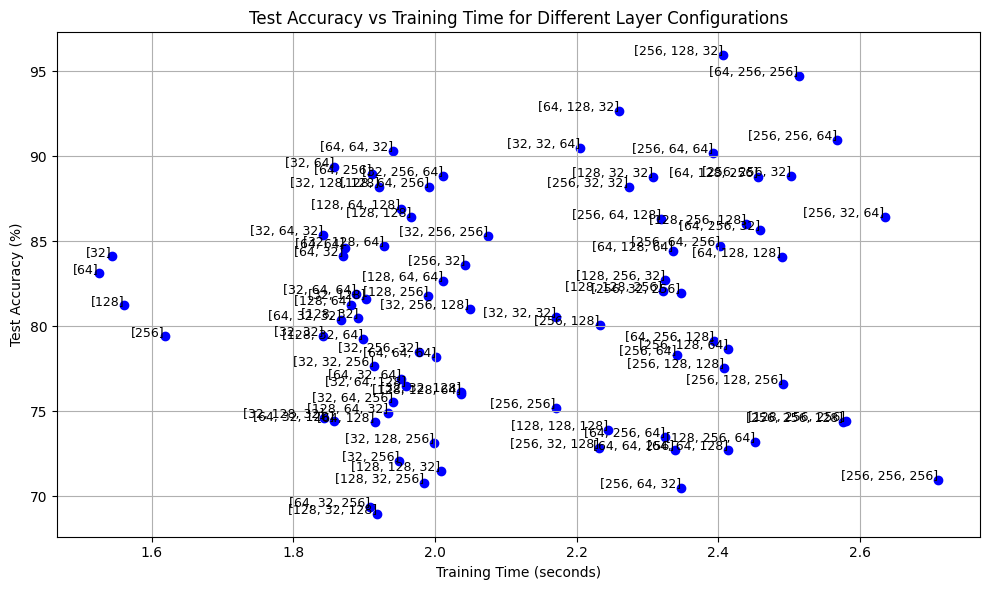

In [131]:
test_accuracies = [result['test_correct'] * 100 for result in results]  # List of test accuracies (in percentage)
layer_configs = [str(result['layers']) for result in results]  # Layer configurations as strings

# Create a scatter plot for Test Accuracy vs. Training Time
plt.figure(figsize=(10, 6))
for i, layer_size in enumerate(layer_configs):
    plt.scatter(training_times[i], test_accuracies[i], color='b')  # Plot point
    plt.text(training_times[i], test_accuracies[i], layer_size, fontsize=9, ha='right')  # Add text label for each point

# Adding labels and title
plt.xlabel('Training Time (seconds)')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Training Time for Different Layer Configurations')

plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluation of Model

In [16]:
model = MLPBuilder(no_features=X_train.shape[1], layers=[256,128,32])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


tr_loss, tr_correct = [], []
te_loss, te_correct = [], []

for epoch in range(epochs):
    # Train the model
    train_loss, train_correct = train_loop(train_loader, model, criterion, optimizer)
    
    # Test the model
    test_loss, test_correct = test_loop(test_loader, model, criterion)
    
    # Append results to lists for tracking
    tr_loss.append(train_loss)
    tr_correct.append(train_correct)
    te_loss.append(test_loss)
    te_correct.append(test_correct)

torch.save(model.state_dict(), 'models/NN_model.pth')
print("Model saved successfully.")

# Later on, to load the model
# loaded_model = MLPBuilder(no_features=X_train.shape[1], layers=[256, 128, 32])
# loaded_model.load_state_dict(torch.load('model_weights.pth'))
# loaded_model.eval()  # Set the model to evaluation mode
# print("Model loaded successfully.")

Model saved successfully.


In [13]:
model.eval()

# Choose a sample input from the test set
inputs = X_test_tensor[:1]  # Select the first 5 samples for demonstration

# Perform the forward pass
with torch.no_grad():  # No gradients needed for testing
    outputs = model(inputs)

# Print the model output
print("Model Outputs:\n", outputs)

Model Outputs:
 tensor([[4.6385, 4.4409]])


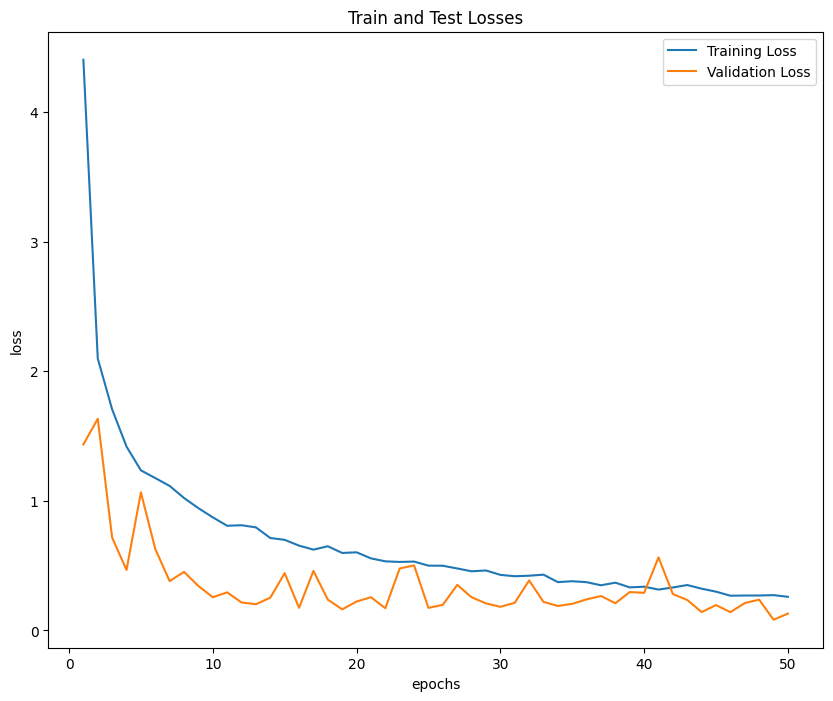

In [17]:

plt.figure(figsize=(10, 8))
plt.plot(range(1,len(tr_loss)+1),tr_loss, label='Training Loss')
plt.plot(range(1,len(te_loss)+1),te_loss,label='Validation Loss')


plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train and Test Losses')
plt.legend()

plt.show()
